<a href="https://colab.research.google.com/github/gkondayya/ACP2021/blob/main/blnr_band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf
import pandas as pd

In [5]:
# Download historical data for required stocks
tickers = ["RELIANCE.NS","IRCTC.NS", "HDFCBANK.NS","INFY.NS","AMBER.NS", "BAJFINANCE.NS"]
ohlcv_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='1mo',interval='5m')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
def Boll_Band(DF, n=14):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MB"] = df["Adj Close"].rolling(n).mean()
    df["UB"] = df["MB"] + 2*df["Adj Close"].rolling(n).std(ddof=0)
    df["LB"] = df["MB"] - 2*df["Adj Close"].rolling(n).std(ddof=0)
    df["BB_Width"] = df["UB"] - df["LB"]
    return df[["MB","UB","LB","BB_Width"]]

In [7]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][["MB","UB","LB","BB_Width"]] = Boll_Band(ohlcv_data[ticker])

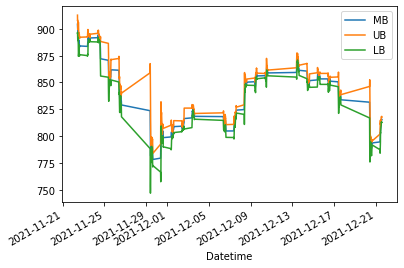

In [8]:
ohlcv_data["IRCTC.NS"][["MB","UB","LB"]].plot() 